# **AP155 Lab Assignment**
## Module 2: Solution of Linear and Nonlinear Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



### Student Information

_Full Name (Last Name, First Name)_: Thoreenz Soldevilla\
_Student No._: 2021-04225\
_Section_: THQ-HX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: 9/11/23, 3:14 PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Thoreenz Soldeviila

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/30
* Problem 2 - XX/30
* Problem 3 - XX/40



In [43]:
import numpy as np

### PROBLEM 1

**Solve for eigenvalues and eigenvectors of a symmetric matrix**

1. Use numpy's $\tt linalg$ package to find the eigenvalues and eigenvectors of the ff. symmetrix matrix *(15 pts.)*:

$ \begin{equation}
{\bf A} =
\begin{pmatrix}
8 & -2 & -20 \\
-2 & -3 & -9 \\
-20 & -9 & -3
\end{pmatrix} \end{equation} $

2. Check your answer numerically; that is, check that $\bf AV = VD$, where the $N$ x $N$ matrix $\bf V$ has the eigenvectors as its columns and $\bf D$ is the diagonal matrix with the eigenvalues $\lambda_i$ as its diagonal entries. *(15 pts.)*

Finding the eigenvalues and eigenvectors follow the equation:
$$
\begin{equation}
Ax = \lambda{}x
\end{equation}
$$
where $\lambda{}$ represents the eigenvalues of the matrix.

We define $\tt A1$ as a numpy array where the elements are composed of the matrix rows. We then calculate the eigenvalues $\tt x1$ and the vectors $\tt V1$ using the $\tt eigh()$ function in $\tt linalg$.

In [44]:
#We define A with the variable A1.
A1 = np.array([
    [8, -2, -20],
    [-2, -3, -9],
    [-20, -9, -3]
], float)
# We get the eigenvalues and eigenvectors.
x1, V1 = np.linalg.eigh(A1)
print("The eigenvalues are:",x1)
print("The eigenvectors are:",V1)

The eigenvalues are: [-21.99606195   0.16021522  23.83584674]
The eigenvectors are: [[ 0.52496527  0.36793396 -0.76748685]
 [ 0.40892672 -0.89987151 -0.15169114]
 [ 0.74645187  0.2342133   0.62285932]]


We then prove that the matrix A1 is symmetric by multiplying $\tt A1$ to the $\tt V1$ and equate it with $\tt V1$ multiplied by $\tt D1$. We use the $\tt matmul()$ method found ni numpy.

In [45]:
D1 = np.array([
    [x1[0], 0, 0],
    [0, x1[1], 0],
    [0, 0, x1[2]]
])
print("A1*V1 = ", np.matmul(A1, V1))
print("V1*D1 = ", np.matmul(V1, D1))

A1*V1 =  [[-11.54716868   0.05894862 -18.29369893]
 [ -8.99477756  -0.14417311  -3.61568676]
 [-16.4190016    0.03752454  14.8463793 ]]
V1*D1 =  [[-11.54716868   0.05894862 -18.29369893]
 [ -8.99477756  -0.14417311  -3.61568676]
 [-16.4190016    0.03752454  14.8463793 ]]


We see in the output that both the left-hand side and the right-hand side produce the same matrix.

### PROBLEM 2

**Solve a nonlinear equation using the relaxation method**

Consider the equation $x=1- e^{-cx}$, where $c$ is a known parameter and $x$ is unknown. This equation arises in a variety of situations, including the physics of contact processes, mathematical models of epidemics, and the theory of random graphs.

1. Write a program to solve this equation for $x$ using the relaxation method for the case $c = 2$. Calculate your solution to an accuracy of at least $10^{-6}$. *(10 pts.)*

2. Modify your program to calculate the solution for values of $c$ from 0 to 3 in steps of 0.01. *(10 pts.)*

3. Make a plot of $x$ as a function of $c$. Describe the different regimes that you see. *(10 pts.)*

The relaxation method is implemented by solving the function using an initial value and substituting the new value to the equation. It is defined by the following: 
$$ x_{i} = f(x_{i-1})$$
Where $x_{i-1}$ is the value from the previous iteration.

In [46]:
# Since the function requires an exponential function, we import it using the math module. We then define the 
# function as f2, taking arguments to supply c and x.
from math import exp
def f2(c, x):
    return 1 - exp(-c*x) 

The problem then asks for the accuracy of the solution to $10^{-6}$. We implement this by finding the value difference, $\tt x diff$, by finding the difference of the current and previous solution to the function.

In [47]:
# We converge the function to a solution accurate to 10e-6.
def relx_while(f, c, x):
    x_diff = 1.0 # initial solution difference
    x_store = 0.0 # where we store the previous solution
    iteration = 0 # variable that counts the iterations
    # We implement a conditional that stops the iteration when it reaches the target accuracy.
    while x_diff >= 10e-6: 
        x = f(c, x)
        iteration += 1
        print("Iteration {}:".format(iteration),x)
        # We find the solution difference
        x_diff = abs(x_store-x)
        print("Value Difference:", x_diff)
        x_store = x
    return x
relx_while(f2, 2.0, 1.0)

Iteration 1: 0.8646647167633873
Value Difference: 0.8646647167633873
Iteration 2: 0.8225966691808597
Value Difference: 0.04206804758252758
Iteration 3: 0.8070247503317746
Value Difference: 0.015571918849085153
Iteration 4: 0.8009201942366403
Value Difference: 0.0061045560951342726
Iteration 5: 0.7984747083247583
Value Difference: 0.002445485911881984
Iteration 6: 0.7974866394625985
Value Difference: 0.0009880688621598521
Iteration 7: 0.797086049491047
Value Difference: 0.00040058997155145715
Iteration 8: 0.796923413762181
Value Difference: 0.00016263572886598965
Iteration 9: 0.7968573480008734
Value Difference: 6.606576130763209e-05
Iteration 10: 0.7968305046795713
Value Difference: 2.6843321302094658e-05
Iteration 11: 0.7968195968986895
Value Difference: 1.0907780881752593e-05
Iteration 12: 0.7968151643557075
Value Difference: 4.432542981991361e-06


We find that the answer to the equation with $c = 2$ is roughly equal to **0.797**.

We then model the equation from $c=0$ to $c=3$ with a step of 0.01. We get the number of steps by dividing the upper bound of the x-axis with the step. Hence, the number of steps required is $\frac{3}{0.001}=300$ steps.

In [48]:
# We define the x-points using the linspace() module, from 0 to 3 with 300 steps.
x2_data = np.linspace(0, 3, 300)
# We will append the solutions from each x-point to the y2_data array.
y2_data = []
def relx_while_mute(f, c, x):
    x_diff = 1.0
    x_store = 0.0
    iteration = 0
    while x_diff >= 10e-6:
        x = f(c, x)
        iteration += 1
        x_diff = abs(x_store-x)
        x_store = x
    return x
# We implement the solutions and append it to the designated y-axis array.
for k in range(300):
    y2_data.append(relx_while_mute(f2, x2_data[k], 1.0))

<function matplotlib.pyplot.show(*args, **kw)>

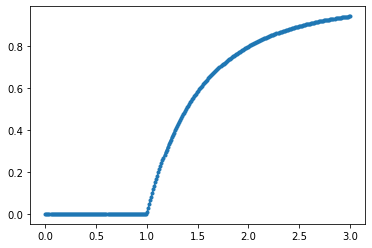

In [49]:
from matplotlib import pyplot as plt
plt.plot(x2_data, y2_data, marker=".")
plt.show

We see here that as we define $c$ from 0 to 1, the model is flat. It logarithmically increases until 2.0 and starts to asymptotically flatten onwards.

The sudden phase shift shown in the graph is shown as a percolation transition. This means that as described in the equation, the process must have a $c$ of 1.0 for a process to undergo a phase transition. In the case of epidemics, a $c$ of greater than or equal to 1 would be sufficient for an epidemic to occur.

### PROBLEM 3

**Physics Application: Calculating the Lagrange point**

_Refer to Exercise 6.16 of the Newman text._ The $L_1$ Lagrange point is the point between the Earth and the Moon at which a satellite will orbit the Earth in perfect synchrony with the Moon, staying always in between the two.

Assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satellite, the distance $r$ from the center of the Earth to the $L_1$ point satisfies
$$ \begin{equation}
\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,
\end{equation} $$
where $R$ is the distance from the Earth to the Moon, $M$ and $m$ are the Earth and Moon masses, $G$ is Newton's gravitational constant, and $\omega$ is the angular velocity of both the Moon and the satellite.

Use Newton's method to solve for the distance r from the Earth to the $L_1$ point. Compute a solution accurate to at least four significant figures.

We convert the equation into an iterable function of r on the right-hand side by equating the right-hand side by 0, resulting into:

$$ \begin{equation}
f(r) = G(\frac{M}{r^2} - \frac{m}{(R-r)^2}) - \omega^{2}r
\end{equation} $$

In [50]:
# We define the function with their respective constants:
def f3(x):
    G = 6.674e-11
    w = 2.662e-6
    M = 5.9724e24
    m = 7.348e22
    R = 3.844e8
    return G*((M/(x**2))-(m/((R-x)**2))) - w**2*x

We use the Newton's method to guess the root of the equation. This is defined as:
$$ x_i = x_{i-1} - \frac{f(x_{i-1})}{f'(x_{i-1})}$$
Where $x_i$ is the new guess for the root, and $x_{i-1}$ is a previous guess estimate. 
I used the $\tt sympy$ module to be able to do differential calculus.

In [51]:
import sympy as sp
# import the variables
x, y, z = sp.symbols('x y z')
sp.init_printing(use_unicode=True)

In [52]:
# We then define the differential function that takes any math function and the value to be substituted.
def diff_x(f, sub):
    return sp.diff(f(x),x).evalf(subs={x:sub})

In [53]:
# The Newton method takes x_1 as previous guess estimates. The tolerance acts as a conditional that would 
# stop the convergence of the algorithm to the root.
def secant(f, x_1, tolerance):
    epsilon = 1.0 # initialization of error
    x_2 = 0
    while epsilon >= tolerance:
        # newton method definition
        x_2 = x_1 - f(x_1)/diff_x(f, x_1)
        epsilon = abs(x_2-x_1)
        # We then substitute the values into the new guesses for the root.
        x_1 = x_2
        print("guess:",x_2)
        print("epsilon:",epsilon)
    return x_2

In [54]:
# Implementing the method
secant(f3, 300e6, 10e-4)

guess: 330505771.969731
epsilon: 30505771.9697309
guess: 326352126.000471
epsilon: 4153645.96926033
guess: 326033930.593022
epsilon: 318195.407448888
guess: 326032425.191375
epsilon: 1505.40164613724
guess: 326032425.158219
epsilon: 0.0331563353538513
guess: 326032425.158219
epsilon: 0


In [55]:
# We can choose another first guess for the root, and we still arrive at the same result.
secant(f3, 200e6, 10e-4)

guess: 277594458.571707
epsilon: 77594458.5717074
guess: 330560777.425955
epsilon: 52966318.8542481
guess: 326360361.280793
epsilon: 4200416.14516211
guess: 326034009.425184
epsilon: 326351.855609775
guess: 326032425.194939
epsilon: 1584.23024469614
guess: 326032425.158219
epsilon: 0.0367197394371033
guess: 326032425.158219
epsilon: 0


We see that the $L_1$ of the Earth and Sun is equal to $3.260 * 10^8$ km.